In [226]:
# Ridam Pal PhD19201
# Harsh Bandhey 17234
# Vishesh Agrawal 18420

# Importing the Libraries

In [202]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Loading the dataset

In [203]:
# Reading the csv file 
df = pd.read_csv('kaggle_train.csv')
df.shape

(242, 320)

In [204]:
# Creating the head of the dataframe
df.head()

,ID,Labels,ACAN,AGER,ALPK1,ANKRD17,APOB,APPL1,APPL2,ARRB2,...,UBE2N,UBE2V1,UBQLN1,UFD1,UNC93B1,USP17L2,VCAN,WDFY1,XIAP,ZCCHC3
0,TCGA-JW-A5VG,0,13.6584,88.0205,402.5420,1424.2625,3.7940,1001.2330,508.0148,567.2010,...,2437.6363,3413.2107,4135.4453,950.0104,1434.1269,0.0000,31.8695,923.0769,1046.0021,819.1217
1,TCGA-HG-A2PA,0,22.0844,86.3807,690.4861,2226.3285,20.4071,486.9744,1448.0640,651.9083,...,2153.9253,1817.3762,3426.4325,1380.1196,815.7241,0.0000,1651.0166,1473.7825,1618.8684,615.8465
2,TCGA-C5-A0TN,0,32.7422,53.0820,128.4882,1073.0497,0.0000,654.8431,492.6206,512.9604,...,3122.4110,3720.6995,3000.3721,2681.3791,1429.2447,0.4961,693.5384,477.2417,1064.6161,804.1672
3,TCGA-C5-A1BM,0,22.7975,42.1175,634.0804,3285.5487,0.0000,574.9614,513.9104,1033.2303,...,2663.4467,3217.9212,4131.3756,1178.8640,1018.5471,0.0000,675.0386,1596.5997,1666.1515,402.6275
4,TCGA-EK-A2RA,0,2.5000,134.0625,532.1875,936.5625,0.0000,1933.4375,679.3750,1175.6250,...,1898.4375,3009.1375,2549.3750,1293.1156,744.6875,0.0000,69.0625,1651.5625,1250.3125,982.5000


# Creating X_train and y_train

In [205]:
# put labels into y_train variable
y_train = df["Labels"]
# Drop 'label' and 'ID' columns for creating X_train
X_train = df.drop(labels = ["Labels","ID"],axis = 1) 

# Feature Selection

In [183]:
# Selecting top 25 features using ExtraTreesClassifier.

from sklearn.ensemble import ExtraTreesClassifier

TOP_FEATURES = 25

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 68 (0.018041)
2. feature 266 (0.011471)
3. feature 204 (0.010963)
4. feature 267 (0.010941)
5. feature 314 (0.010907)
6. feature 210 (0.010354)
7. feature 201 (0.009529)
8. feature 238 (0.009381)
9. feature 60 (0.009320)
10. feature 199 (0.009224)
11. feature 236 (0.008847)
12. feature 159 (0.008605)
13. feature 231 (0.008544)
14. feature 171 (0.008170)
15. feature 76 (0.007969)
16. feature 232 (0.007798)
17. feature 209 (0.007409)
18. feature 294 (0.007322)
19. feature 278 (0.007178)
20. feature 47 (0.007075)
21. feature 200 (0.006829)
22. feature 58 (0.006720)
23. feature 119 (0.006551)
24. feature 301 (0.006430)
25. feature 264 (0.006202)
26. feature 77 (0.006066)
27. feature 93 (0.006054)
28. feature 74 (0.006009)
29. feature 155 (0.005998)
30. feature 38 (0.005725)


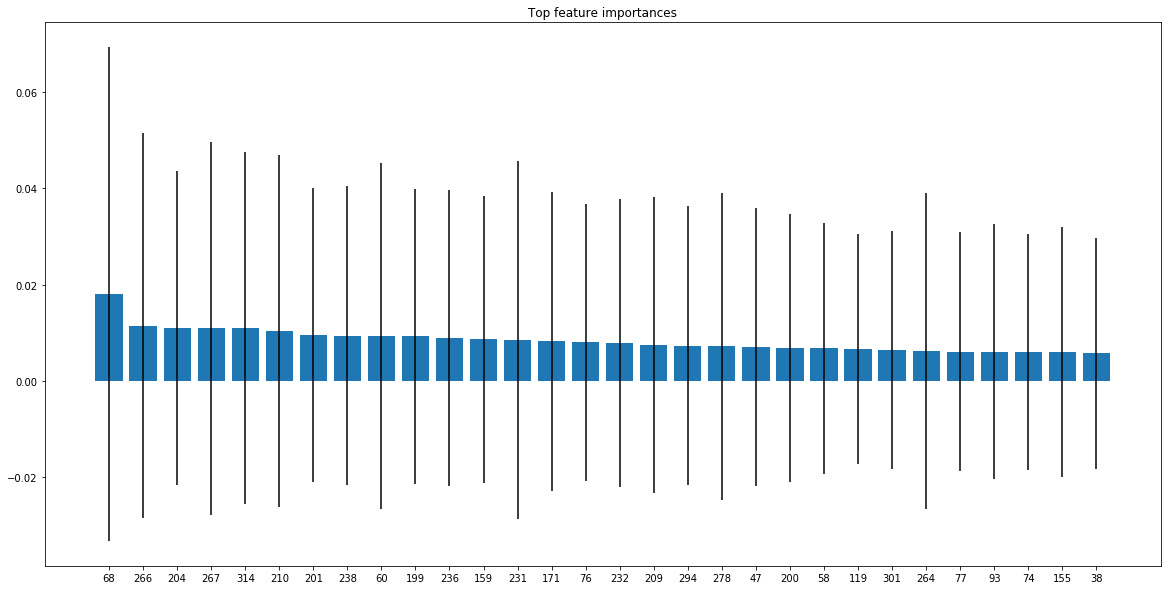

In [184]:
# Plotting the importance of features.
plt.figure(figsize = (20,10))
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()

In [41]:
indices

array([ 68, 266, 204, 267, 314, 210, 201, 238,  60, 199, 236, 159, 231,
       171,  76, 232, 209, 294, 278,  47, 200,  58, 119, 301, 264,  77,
        93,  74, 155,  38], dtype=int64)

In [45]:
# Selecting top 25 features from all the features.
X1 = df.columns.drop(['ID', 'Labels'])
X1=X_train.columns.tolist()
X1 = [X1[i] for i in indices]

In [46]:
# Printing the important features
X1

['CLEC6A',
 'TBK1',
 'PGLYRP1',
 'THBD',
 'VCAN',
 'PIK3R4',
 'PDPK1',
 'RTN4',
 'CLEC3B',
 'OTUD4',
 'RPS6KA3',
 'MAPKAPK2',
 'RIOK3',
 'NFKBIA',
 'CTSB',
 'RIPK1',
 'PIK3C3',
 'TRAF3',
 'TLR5',
 'CLEC14A',
 'OTULIN',
 'CLEC2L',
 'IRAK1',
 'TYRO3',
 'TAB3',
 'CTSK',
 'FCER2',
 'COLEC12',
 'LYN',
 'CD93']

In [207]:
X_train = X_train[X1]

# Visualizing the two classes

1    121
0    121
Name: Labels, dtype: int64

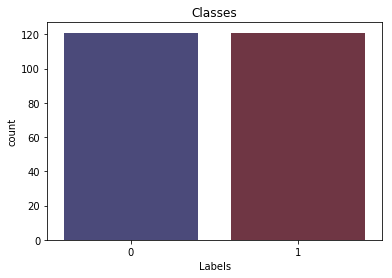

In [208]:
# visualize the classes
#plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Classes")
y_train.value_counts()

In [209]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train.shape

(242, 25)

# Random Forest

In [210]:
# Without oversampling 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

1.0

# Creating Test Dataset

In [211]:
# Reading the csv file 
df_test = pd.read_csv('kaggle_test.csv')
print(df_test.shape)
df_test.head()

(62, 319)


,ID,ACAN,AGER,ALPK1,ANKRD17,APOB,APPL1,APPL2,ARRB2,ASGR1,...,UBE2N,UBE2V1,UBQLN1,UFD1,UNC93B1,USP17L2,VCAN,WDFY1,XIAP,ZCCHC3
0,1001,91.3265,132.5226,331.5548,1658.7666,0.0000,1068.6189,571.2868,699.8387,9.4305,...,1525.2513,3320.8537,2817.7193,1397.1957,367.7876,0.4963,699.3424,995.6570,1219.0098,840.7991
1,1002,17.5971,183.2524,558.8592,2321.6019,0.6068,929.0049,783.9806,1039.4417,27.3058,...,2489.6845,2102.5485,3799.1505,906.5534,1187.5000,0.0000,1967.2330,1529.7330,1083.1311,510.3155
2,1003,120.9309,221.8022,331.8437,891.7940,0.0000,309.4915,403.4852,1430.5385,49.8625,...,1760.6628,4822.9092,3718.4831,1907.9521,1732.0061,0.0000,1190.9692,1156.5812,710.6842,689.4783
3,1004,12.0930,41.8605,886.5116,2216.7442,0.0000,792.5581,1012.0930,637.2093,3.7209,...,1872.5581,2342.0093,3280.9302,1115.3116,773.0233,0.0000,63.2558,1065.1163,1385.1163,563.7209
4,1005,84.0622,34.4995,145.7726,1266.2779,0.4859,1362.4879,830.9038,1064.1399,85.5199,...,1932.9446,3220.9184,3153.5471,1168.6054,965.5005,0.0000,1168.6103,581.6327,878.5228,607.8717


In [212]:
# Drop 'label' column for creating X_train
X_test = df_test.drop(labels = ["ID"],axis = 1) 

In [213]:
lab = df_test.ID

In [214]:
type(lab)

pandas.core.series.Series

In [215]:
X_test = X_test[X1]

# Normalizing the Test data

In [216]:
# Normalizing the test data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_test = ss.fit_transform(X_test)
X_test.shape

(62, 25)

In [196]:
pred = clf.predict(X_test)
predict = pd.Series(pred)

In [49]:
predict.shape

(62,)

In [44]:
type(predict)

pandas.core.series.Series

In [45]:
output = pd.concat([lab,predict],axis=1)
output.head()

,ID,0
0,1001,0
1,1002,1
2,1003,1
3,1004,1
4,1005,0


In [46]:
output.to_csv('output13.csv', header=['ID','Labels'], index=False)

# ANN

In [217]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network of 4-layers architectur
model = Sequential()
model.add(Dense(1024, input_dim=25, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [218]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [219]:
history = model.fit(X_train,y_train, epochs=50)

Epoch 1/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.5950
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.7521
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8554
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9091
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9504
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9711
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9628
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9835
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9917
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 0.9752

In [220]:
y_predict = model.predict(X_test)

In [221]:
y_predict
y_predict.shape

(62, 2)

In [222]:
import numpy as np
predict = list()
for i in range(len(y_predict)):
    predict.append(np.argmax(y_predict[i]))

In [223]:
predict = pd.Series(predict) 

In [224]:
output = pd.concat([lab,predict],axis=1)
output.head()

,ID,0
0,1001,0
1,1002,0
2,1003,1
3,1004,1
4,1005,0


In [225]:
output.to_csv('output29.csv', header=['ID','Labels'], index=False)